# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
140812               2020-07-10           2020-07-10            2020-06-28   
140813               2020-07-10           2020-07-10            2020-07-01   
140814               2020-07-10           2020-07-10            2020-06-20   
140815               2020-07-10           2020-07-10            2020-07-03   
140816               2020-07-10           2020-07-10            2020-07-02   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
140812             2020-06-23 00:00:00                   NaT   
140813                      Asintomáti                   NaT   
140814                      Asintomáti                   NaT   
140815                      Asintomáti                   NaT   
140816             2020-06-26 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación           Departamento  \
Id de caso                                                                  
1                         NaT          Bogotá d.c.            Bogotá D.C.   
2                         NaT  Guadalajara de buga        Valle del Cauca   
3                         NaT             Medellín              Antioquia   
4                         NaT             Medellín              Antioquia   
5                         NaT             Medellín              Antioquia   
...                       ...                  ...                    ...   
140812                    NaT          Santa marta  Santa Marta D.T. y C.   
140813                    NaT         Sabanagrande              Atlántico   
140814                    NaT         Barranquilla      Barranquilla D.E.   
140815                    NaT         Sabanagrande              Atlántico   
140816                    NaT         Sabanagrande              Atlántico   

               Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                            ...                              
1                   Leve  Recuperado  ...               10 - 20    F   
2                   Leve  Recuperado  ...               30 - 40    M   
3                   Leve  Recuperado  ...               40 - 50    F   
4                   Leve  Recuperado  ...               50 - 60    M   
5                   Leve  Recuperado  ...               20 - 30    M   
...                  ...         ...  ...                   ...  ...   
140812              Leve        Casa  ...                0 - 10    F   
140813      Asintomático        Casa  ...               30 - 40    F   
140814      Asintomático        Casa  ...               70 - 80    F   
140815      Asintomático        Casa  ...               40 - 50    F   
140816              Leve        Casa  ...               30 - 40    M   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro 

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                      F        M
Departamento                                                        
Amazonas                                             1011.0   1395.0
Antioquia                                            3492.0   4959.0
Arauca                                                 18.0    123.0
Archipiélago de San Andrés Providencia y Santa ...      7.0     21.0
Atlántico                                            6523.0   7646.0
Barranquilla D.E.                                    8036.0   9677.0
Bogotá D.C.                                         22409.0  22630.0
Bolívar                                               555.0    713.0
Boyacá                                                237.0    242.0
Buenaventura D.E.                                     639.0   1057.0
Caldas                                                170.0    126.0
Caquetá                                                37.0     49.0
Cartagena D.T. y C.                                  4655.0   5810.0
Casanare                                               38.0     74.0
Cauca                                                 303.0    407.0
Cesar                                                 659.0    759.0
Chocó                                                 956.0   1170.0
Cundinamarca                                         1999.0   1960.0
Córdoba                                               744.0    765.0
Guainía                                                 6.0      8.0
Guaviare                                                5.0     37.0
Huila                                                 209.0    207.0
La Guajira                                            379.0    465.0
Magdalena                                             545.0    587.0
Meta                                                  268.0   1247.0
Nariño                                               2035.0   2383.0
Norte de Santander                                    235.0    276.0
Putumayo                                               21.0     28.0
Quindío                                               107.0     87.0
Risaralda                                             380.0    336.0
Santa Marta D.T. y C.                                 745.0    778.0
Santander                                             447.0    797.0
Sucre                                                1103.0   1273.0
Tolima                                                409.0   1015.0
Valle del Cauca                                      5607.0   6650.0
Vaupés                                                 10.0     19.0
Vichada                                                 0.0      1.0

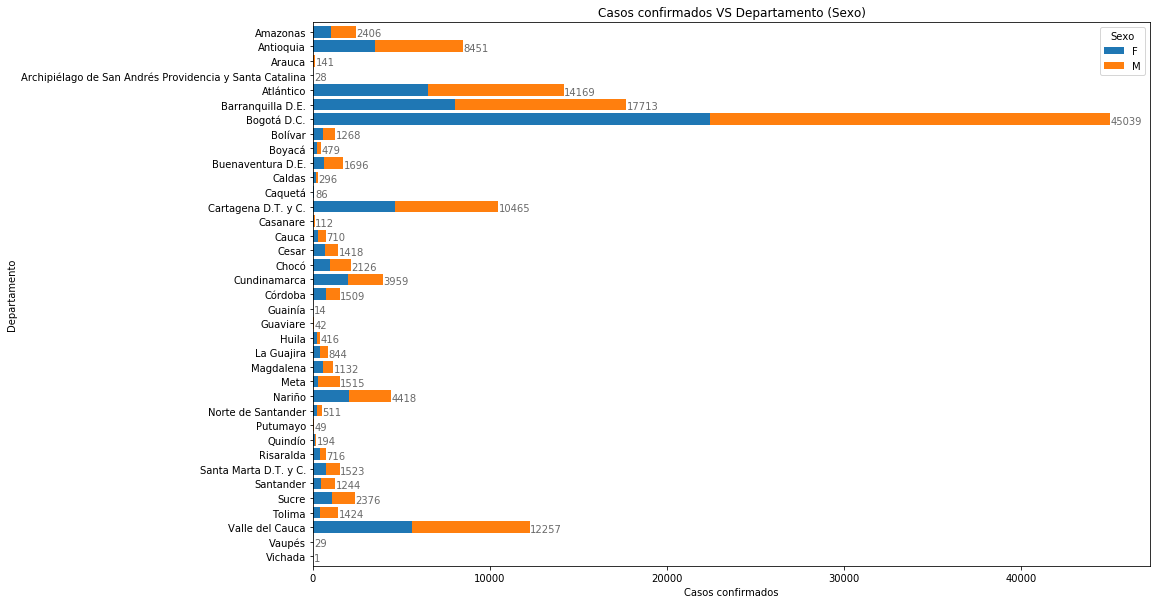

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               124      433      494   
Antioquia                                              315      730     2290   
Arauca                                                   2       33       59   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              599     1014     3136   
Barranquilla D.E.                                      597     1055     3884   
Bogotá D.C.                                           2289     3730    10326   
Bolívar                                                 58      121      285   
Boyacá                                                  28       44       92   
Buenaventura D.E.                                       34      243      380   
Caldas                                                  11       17       63   
Caquetá                                                  2        4       31   
Cartagena D.T. y C.                                    398      718     2421   
Casanare                                                 4        6       30   
Cauca                                                   38       62      148   
Cesar                                                  142      169      313   
Chocó                                                   89      188      506   
Cundinamarca                                           210      301      925   
Córdoba                                                 70       83      302   
Guainía                                                  0        2        4   
Guaviare                                                 0       16        9   
Huila                                                   24       39       71   
La Guajira                                              35       96      208   
Magdalena                                               65       88      199   
Meta                                                    15      103      508   
Nariño                                                 233      406     1039   
Norte de Santander                                      31       25      119   
Putumayo                                                 2        3        8   
Quindío                                                  8       12       29   
Risaralda                                               45       68      154   
Santa Marta D.T. y C.                                   66      100      311   
Santander                                               41      133      341   
Sucre                                                   85      177      539   
Tolima                                                  46       76      501   
Valle del Cauca                                        431      879     2784   
Vaupés                                                   0        3       11   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                463      324      260   
Antioquia                                              2181     1216      951   
Arauca                                                   35        7        3   
Archipiélago de San Andrés Providencia y Santa ...        9        6        3   
Atlántico                                              3356     2210     1872   
Barranquilla D.E.                                      4225     2735     2386   
Bogotá D.C.                                            9656     7086     5951   
Bolívar                                                 314      175      115   
Boyacá                                                   91       73 

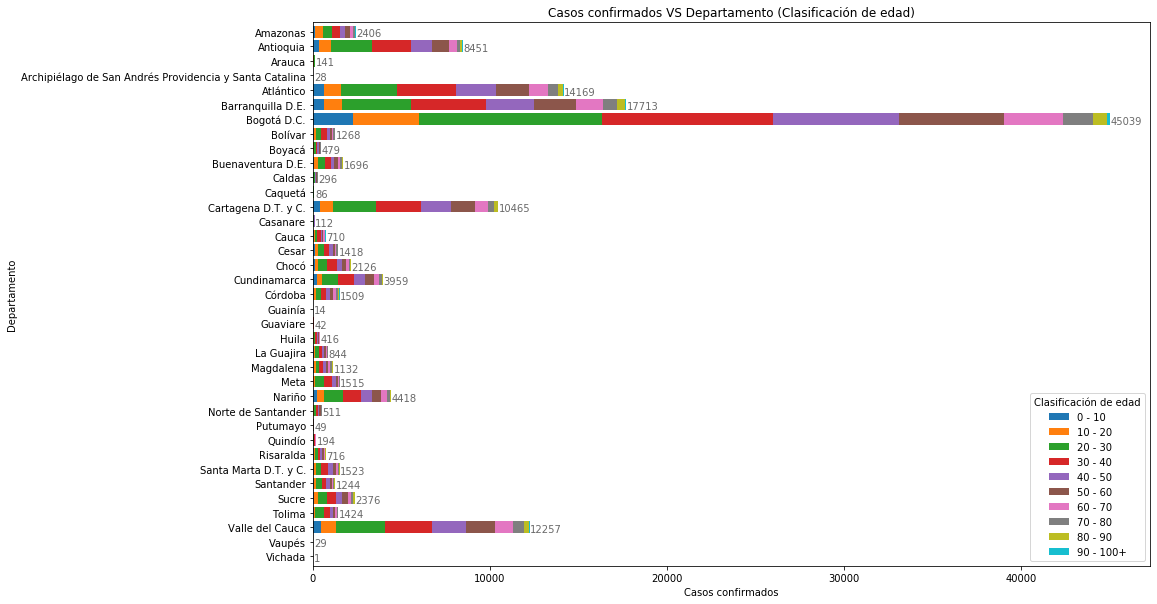

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                              128.0      100.0   
Antioquia                                            5252.0       71.0   
Arauca                                                120.0        0.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            7224.0      698.0   
Barranquilla D.E.                                    8366.0     1058.0   
Bogotá D.C.                                         24609.0     1007.0   
Bolívar                                               603.0       54.0   
Boyacá                                                155.0       14.0   
Buenaventura D.E.                                     405.0      106.0   
Caldas                                                 61.0        7.0   
Caquetá                                                50.0        2.0   
Cartagena D.T. y C.                                  3951.0      378.0   
Casanare                                               57.0        1.0   
Cauca                                                 391.0       23.0   
Cesar                                                 510.0       33.0   
Chocó                                                 983.0       65.0   
Cundinamarca                                         1719.0       81.0   
Córdoba                                               723.0      148.0   
Guainía                                                 2.0        1.0   
Guaviare                                               20.0        0.0   
Huila                                                 103.0       13.0   
La Guajira                                            566.0       44.0   
Magdalena                                             450.0      125.0   
Meta                                                  433.0       17.0   
Nariño                                               1477.0      132.0   
Norte de Santander                                    243.0       25.0   
Putumayo                                               20.0        8.0   
Quindío                                                49.0        5.0   
Risaralda                                             311.0       20.0   
Santa Marta D.T. y C.                                 806.0       71.0   
Santander                                             785.0       24.0   
Sucre                                                1521.0      142.0   
Tolima                                                842.0       25.0   
Valle del Cauca                                      5513.0      426.0   
Vaupés                                                  7.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                10.0           7.0   
Antioquia                                              398.0          53.0   
Arauca                                                   1.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              558.0          90.0   
Barranquilla D.E.                                      791.0         112.0   
Bogotá D.C.                                           2455.0         144.0   
Bolívar                                                 73.0          10.0   
Boyacá                                                  32.0           2.0   
Buenaventura D.E.                                      112.0          19.0   
Caldas                                                  12.0           1.0   
Caquetá                                                  9.0           1.0   
Cartagena D.T. y C.  

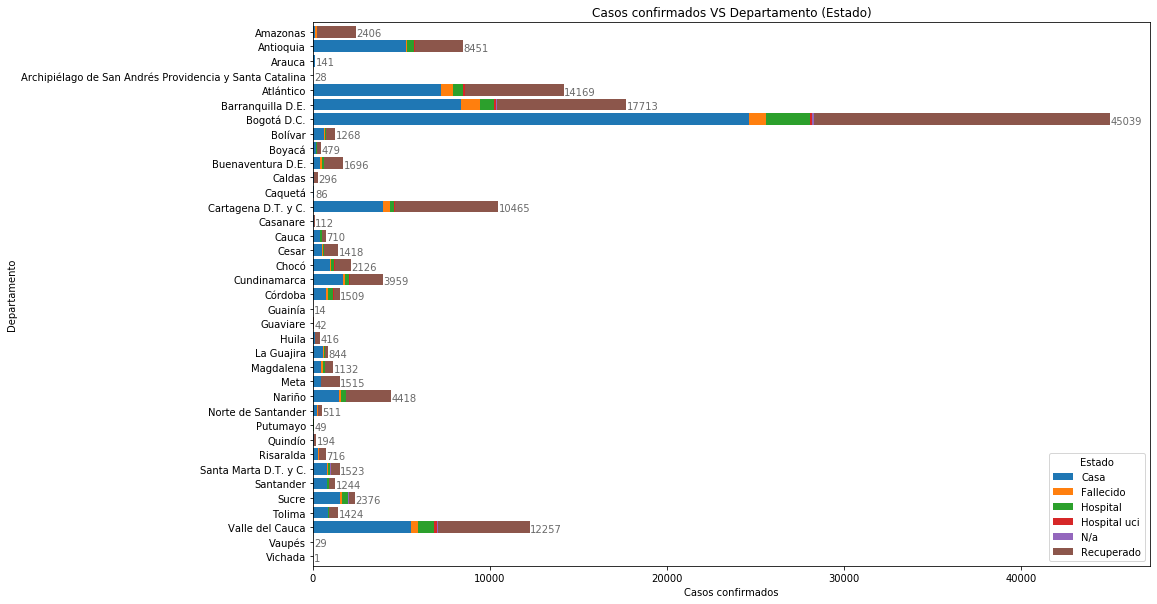

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          32157  36304
Fallecido      1870   3055
Hospital       3156   4217
Hospital uci    341    599
N/a             122    155
Recuperado    27353  31447

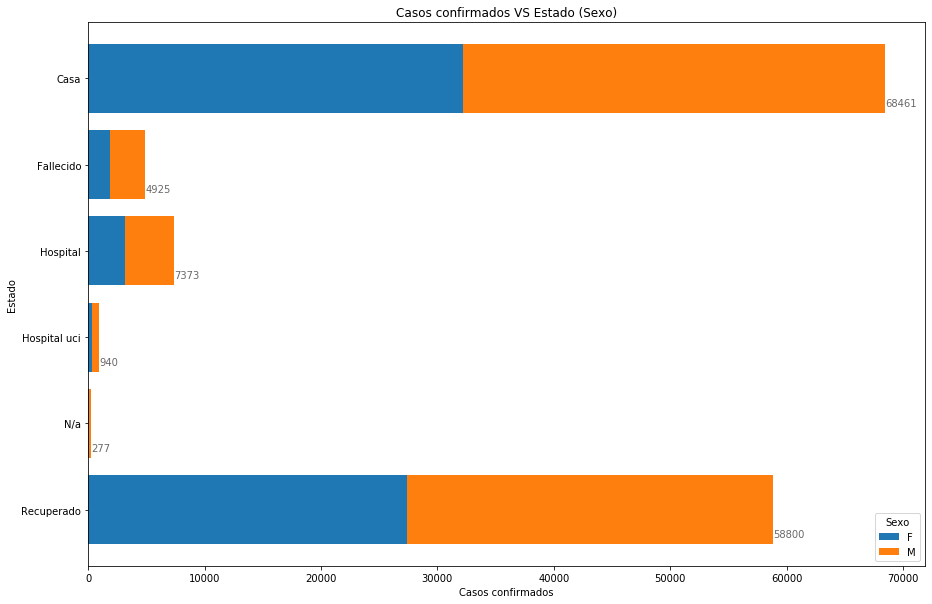

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     2898     5474    17456    17095    10698     8224   
Fallecido                  11       11       75      179      417      753   
Hospital                  265      173      622      992     1155     1488   
Hospital uci               42       22       35      103      132      197   
N/a                         7        7       12       13       20       33   
Recuperado               2914     5492    14328    13627     9143     7092   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      4050     1728      716        122  
Fallecido                 1150     1226      885        218  
Hospital                  1310      872      429         67  
Hospital uci               215      138       48          8  
N/a                         66       59       46         14  
Recuperado                3698     1738      660        108

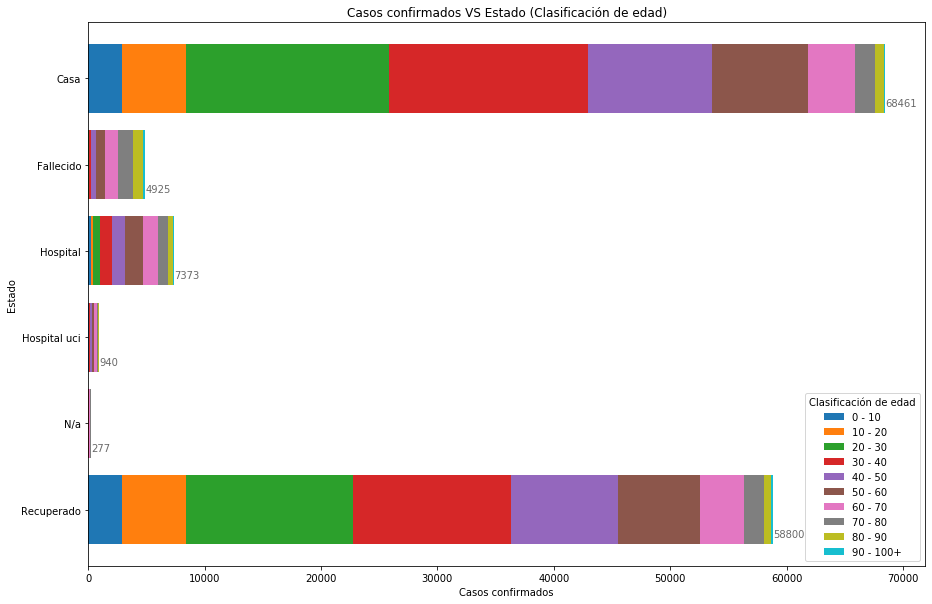

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F      M
Tipo                     
En estudio   59454  65152
Importado      447    512
Relacionado   5098  10113

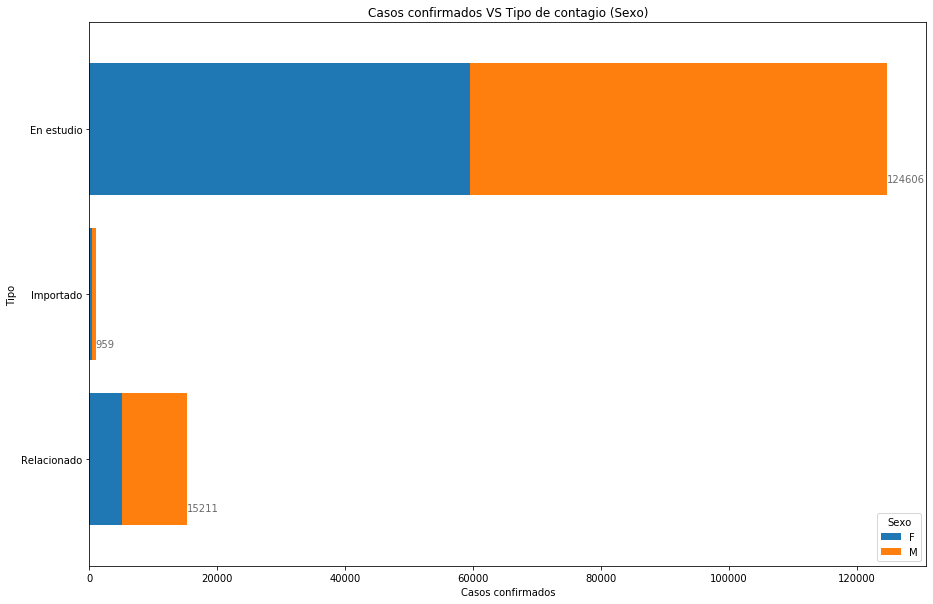

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               5351     9093    28091    28219    19439    16237   
Importado                   5       34      236      225      170      149   
Relacionado               781     2052     4201     3565     1956     1401   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio                9680     5393     2607        496  
Importado                   95       35        9          1  
Relacionado                714      333      168         40

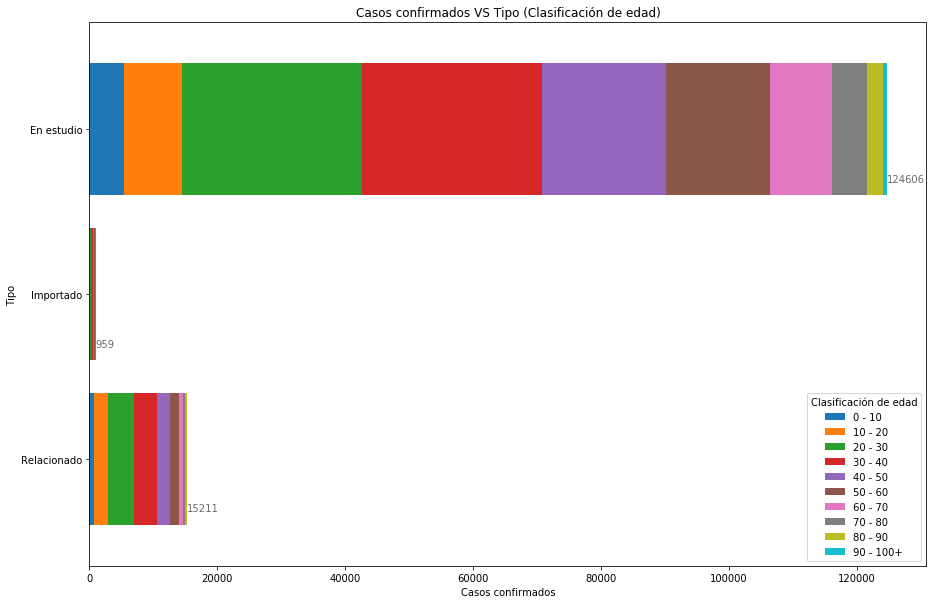

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  3116   3021
10 - 20                 5032   6147
20 - 30                15008  17520
30 - 40                14545  17464
40 - 50                 9965  11600
50 - 60                 8192   9595
60 - 70                 4851   5638
70 - 80                 2605   3156
80 - 90                 1381   1403
90 - 100+                304    233

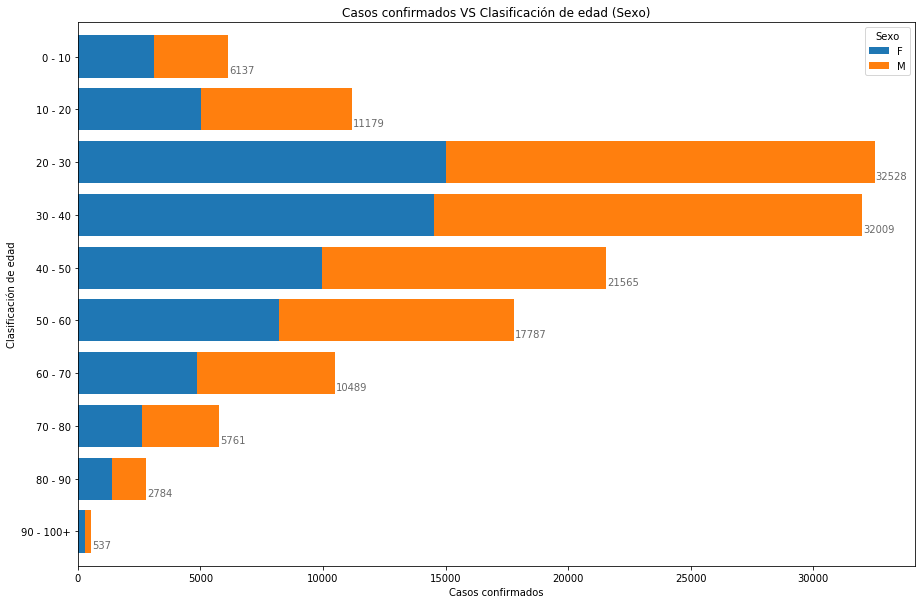

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  2898         11       265            42    7   
10 - 20                 5474         11       173            22    7   
20 - 30                17456         75       622            35   12   
30 - 40                17095        179       992           103   13   
40 - 50                10698        417      1155           132   20   
50 - 60                 8224        753      1488           197   33   
60 - 70                 4050       1150      1310           215   66   
70 - 80                 1728       1226       872           138   59   
80 - 90                  716        885       429            48   46   
90 - 100+                122        218        67             8   14   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       2914  
10 - 20                      5492  
20 - 30                     14328  
30 - 40                     13627  
40 - 50                      9143  
50 - 60                      7092  
60 - 70                      3698  
70 - 80                      1738  
80 - 90                       660  
90 - 100+                     108

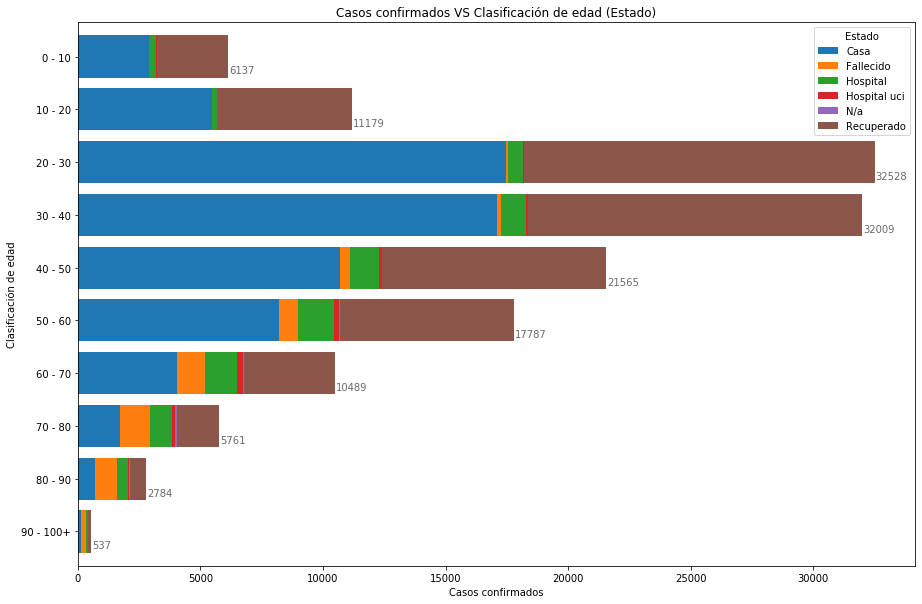

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-06            1464.0  1638.0
2020-07-07            2018.0  2302.0
2020-07-08            1859.0  2048.0
2020-07-09            2324.0  2742.0
2020-07-10            2887.0  3471.0

[124 rows x 2 columns]

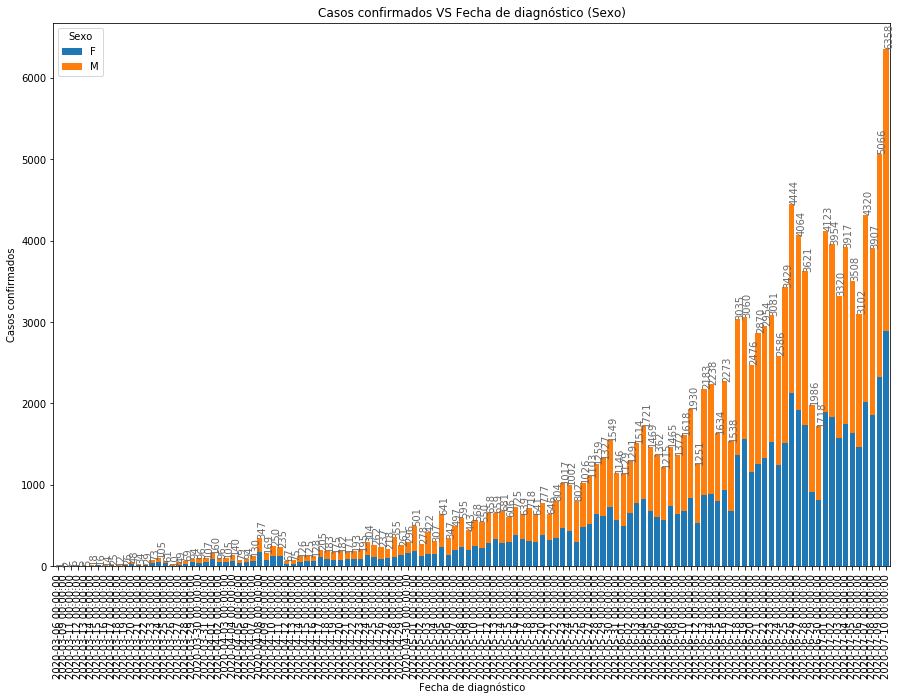

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-06                134      236      696      738      484      409   
2020-07-07                158      247     1030     1065      715      550   
2020-07-08                158      246      880      915      631      523   
2020-07-09                172      344     1190     1216      775      641   
2020-07-10                214      439     1544     1561      979      824   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-06                 245       98       47         15  
2020-07-07                 284      163       98         10  
2020-07-08                 301      156       84         13  
2020-07-09                 391      206      108         23  
2020-07-10                 427      247      100         23  

[124 rows x 10 columns]

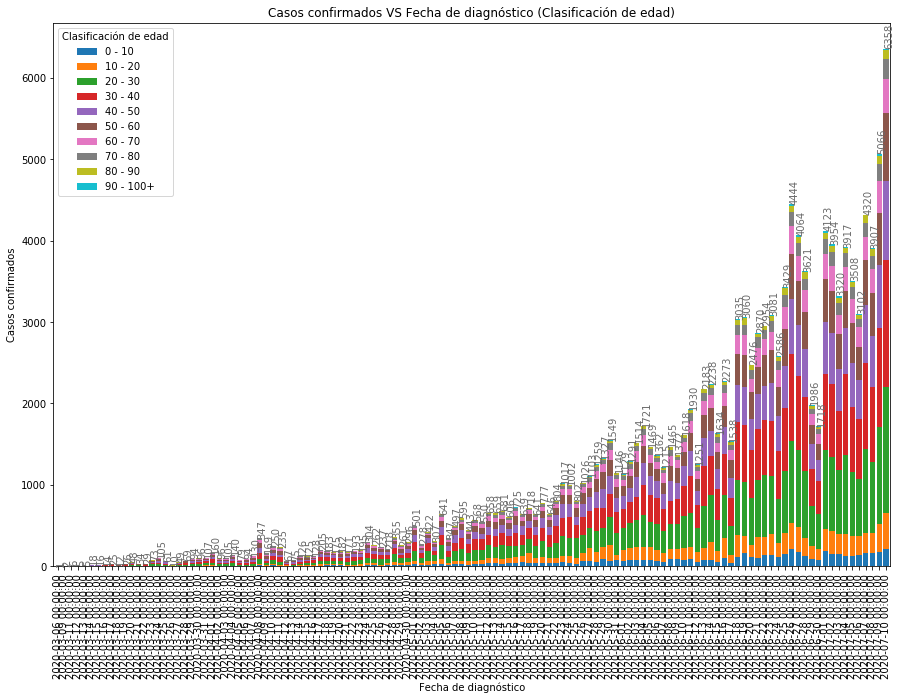

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-06            2839.0       54.0     187.0          13.0  4.0   
2020-07-07            3803.0       91.0     355.0          26.0  6.0   
2020-07-08            3471.0       99.0     302.0          27.0  3.0   
2020-07-09            4467.0      117.0     439.0          35.0  1.0   
2020-07-10            5946.0        8.0     370.0          34.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-06                   5.0  
2020-07-07                  39.0  
2020-07-08                   5.0  
2020-07-09                   7.0  
2020-07-10                   0.0  

[124 rows x 6 columns]

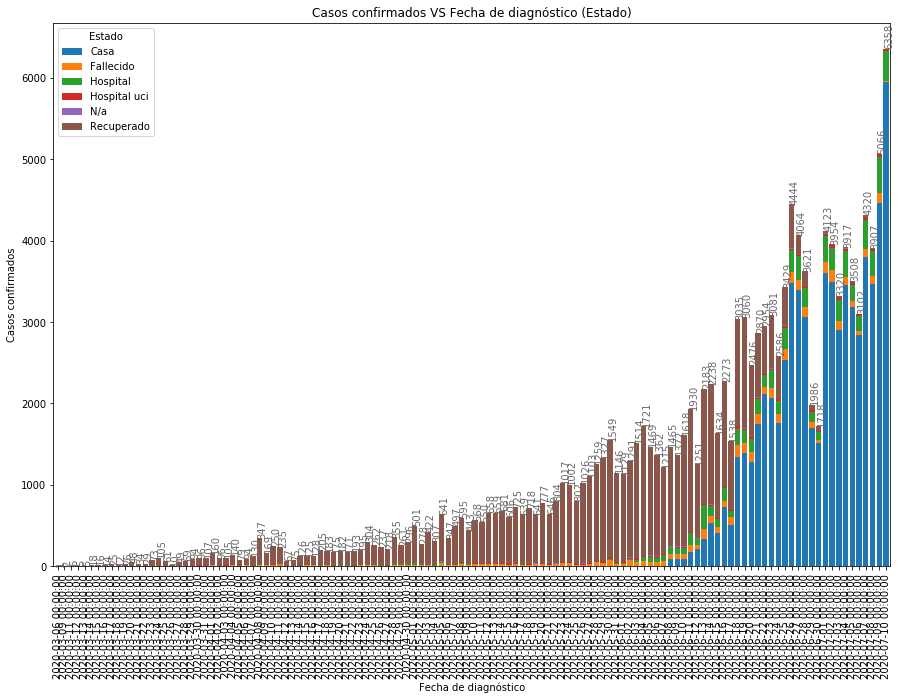

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F        M
Fecha de diagnóstico                  
2020-03-06                1.0      0.0
2020-03-09                2.0      1.0
2020-03-11                6.0      3.0
2020-03-12               11.0      3.0
2020-03-13               13.0      6.0
...                       ...      ...
2020-07-06            54404.0  63449.0
2020-07-07            56422.0  65751.0
2020-07-08            58281.0  67799.0
2020-07-09            60605.0  70541.0
2020-07-10            63492.0  74012.0

[124 rows x 2 columns]

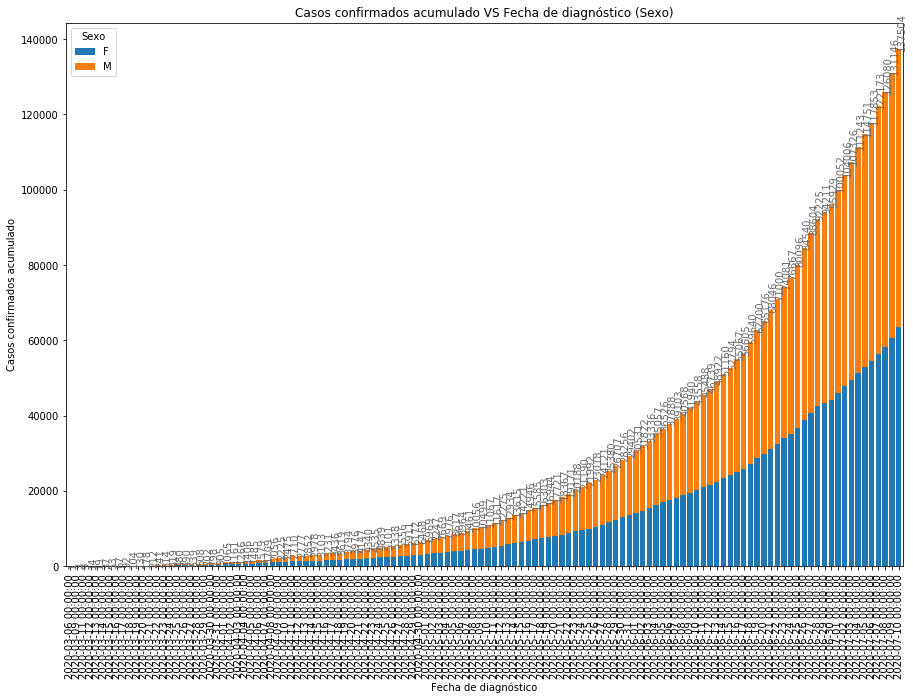

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-06               5312     9664    27116    26455    17989    14853   
2020-07-07               5470     9911    28146    27520    18704    15403   
2020-07-08               5628    10157    29026    28435    19335    15926   
2020-07-09               5800    10501    30216    29651    20110    16567   
2020-07-10               6014    10940    31760    31212    21089    17391   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-06                8836     4847     2322        459  
2020-07-07                9120     5010     2420        469  
2020-07-08                9421     5166     2504        482  
2020-07-09                9812     5372     2612        505  
2020-07-10               10239     5619     2712        528  

[124 rows x 10 columns]

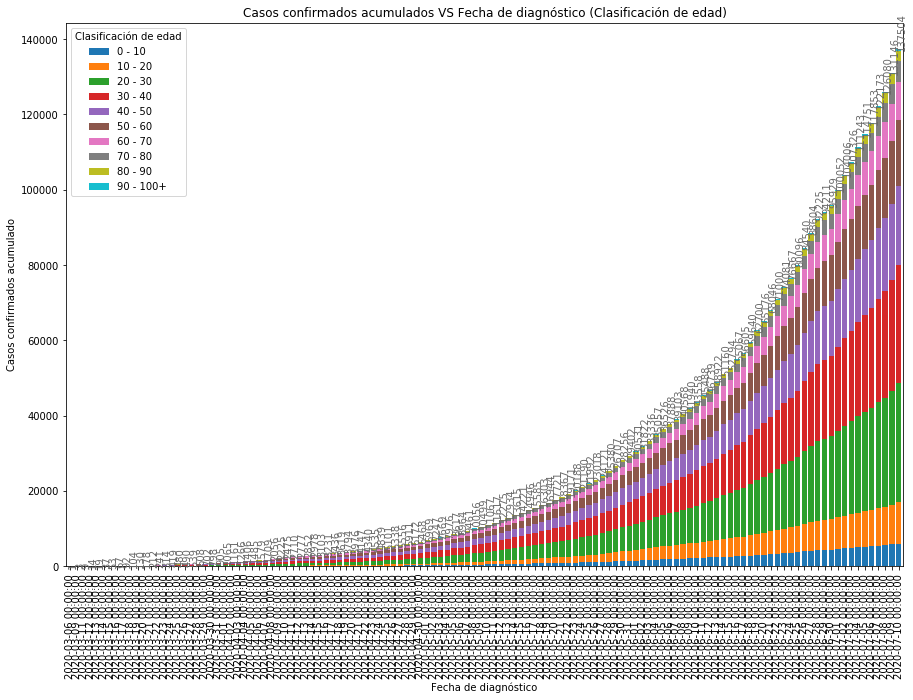

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-06            50029.0     4478.0    5776.0         784.0  255.0   
2020-07-07            53832.0     4569.0    6131.0         810.0  261.0   
2020-07-08            57303.0     4668.0    6433.0         837.0  264.0   
2020-07-09            61770.0     4785.0    6872.0         872.0  265.0   
2020-07-10            67716.0     4793.0    7242.0         906.0  265.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-06               56531.0  
2020-07-07               56570.0  
2020-07-08               56575.0  
2020-07-09               56582.0  
2020-07-10               56582.0  

[124 rows x 6 columns]

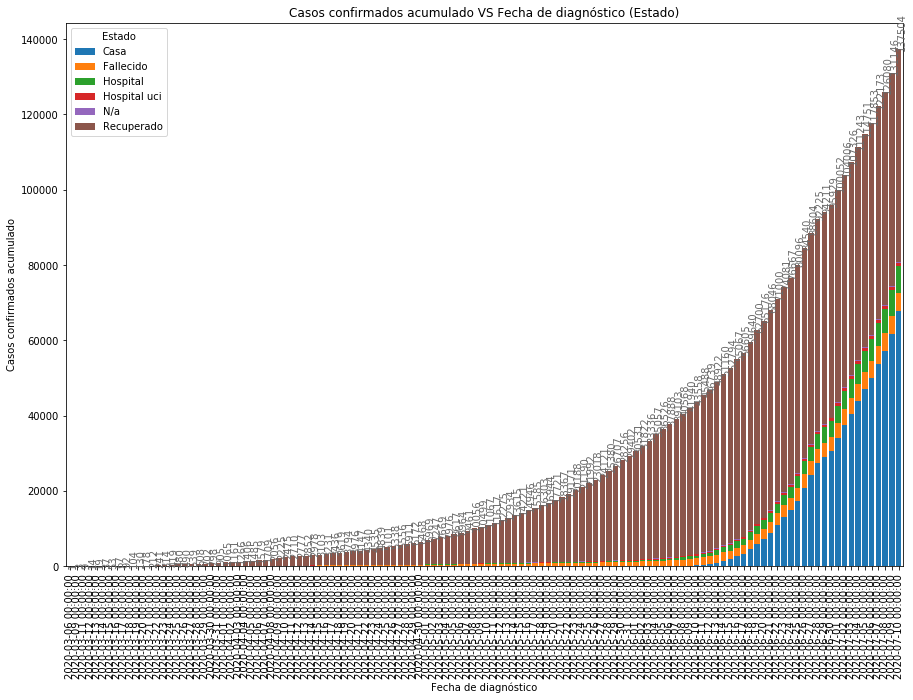

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>